In [2]:
import pandas
from wandb import magic
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


wandb: Wandb version 0.8.19 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
Using TensorFlow backend.


In [3]:
import pandas as pd
import numpy as np

# predicts 7/12, 8/11 or 6/8
sequences = ['H375S', 'WT', 'LM', 'LM_H375S', 'H375S_H61Y', 'H375S_Q105H', 'H375S_V108I', 'H375S_Q105H_V108I', 'H375S_NIK474_476DMR', 'H375S_Q105H_V108I_NIK474_476DMR', 'H375T', 'LM_H375T']
#sequences = ['H375S', 'WT', 'LM', 'LM_H375S', 'H375S_H61Y', 'H375S_Q105H', 'H375S_V108I', 'H375S_Q105H_V108I', 'H375S_Q105H_V108I_NIK474_476DMR', 'H375T', 'LM_H375T']
#sequences = ['H375S', 'H375S_H61Y', 'H375S_Q105H', 'H375S_V108I', 'H375S_Q105H_V108I', 'H375S_NIK474_476DMR', 'H375S_Q105H_V108I_NIK474_476DMR', 'H375T']
#sequences = ['H375S']

active = [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]  
#active = [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1] 
#active = [0, 0, 0, 0, 0, 1, 0, 1] 
#active = [0]


my_dict = {}

for seq,act in zip(sequences,active):

    df=pd.read_csv('output-rgyr-%s.dat'%seq, sep=" ",header=None)
    df1=pd.read_csv('output-charge-%s.dat'%seq, sep=" ",header=None)
    df2=pd.read_csv('output-dot-%s.dat'%seq, sep=" ",header=None)
    df3=pd.read_csv('output-%s.dat'%seq, sep=" ",header=None)
    df4=pd.read_csv('output-pt0-tot-%s.dat'%seq, sep=" ",header=None)
    df5=pd.read_csv('output-charge-std-%s.dat'%seq, sep=" ",header=None)
    my_dict[seq]=[df4,act]
    #input data is df4, which is the average dipole moment per time step across the 5 replicate trajectories
    #y = np.array(my_dict['H375S'])
    
    

In [4]:
a = []
#Here I am adding each first column of the data as an array per sequence
#For example, the average dipole moment across 5 replicas of the first timestep for H375S is: -3.67851 -2.19384 1.71885
for seq in sequences:
    a.append(my_dict[seq][0].values)
#print(a)

In [5]:
#a = a.reshape(a.shape[0], -1)  
a = np.asarray(a)
a = a.reshape(a.shape[0], -1)
print (a)
X = a
Y = active
#print (b)

[[ -2.8466332    0.4870854   -2.19924092  -3.16172576  -5.01941824
    2.70913076  -4.77747345  -1.80289662   2.66193199  -3.11892295
   -2.47863531   3.21628737  -4.48778868  -2.15532875   2.20614076]
 [ -3.45033669  -4.63814354   2.43113422  -5.14350986   0.88839942
    2.41240644  -6.37243795   4.61542654   0.64635426  -3.57225227
   -1.34722579   2.98118758   0.66992515  -3.17044067  -0.10806453]
 [ -5.56045818  -1.46790457   3.30935311  -4.91776848   2.71892452
    3.18388247  -3.61188626   0.9636091    2.82110929  -3.90747356
   -5.30803776   4.88333893  -3.96387386  -3.90625381   1.14402461]
 [ -6.71906996  -8.36864567   1.61141038  -5.75638866   4.37827635
   -0.055243    -4.51404858  -9.54637337   1.16040933  -4.10686398
    0.18335484   3.04668164  -3.15018129  -3.08053541   2.01455808]
 [ -4.05333805  -3.17776012   4.59513903  -5.91127682  -6.81819487
    3.85489607 -10.0897274   -2.87265515   2.2580235  -10.13624477
   -5.37688446   5.45007706  -7.06479979  -0.387748    -0.

In [5]:
#the reason the shape of a below is 12, 60000 is that there are 12 sequences and 20000 timesteps x 3 coordinates = 60000 features
a.shape

(12, 15)

In [6]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [7]:
model = Sequential()
model.add(Dense(15, input_dim=15, activation='relu'))
model.add(Dense(14, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, Y, epochs=300, batch_size=100, verbose=0)
# make class predictions with the model
predictions = model.predict_classes(X)

wandb: Wandb version 0.8.19 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [8]:
sequences2 = ['H375S_H61Y_Q105H_V108I', 'H375T_H61Y_Q105H_V108I', 'H61Y_Q105H_V108I']
#sequences = ['H375S']
my_dict2 = {}

for seq2 in sequences2:

    df=pd.read_csv('output-rgyr-%s.dat'%seq2, sep=" ",header=None)
    df1=pd.read_csv('output-charge-%s.dat'%seq2, sep=" ",header=None)
    df2=pd.read_csv('output-dot-%s.dat'%seq, sep=" ",header=None)
    df3=pd.read_csv('output-%s.dat'%seq, sep=" ",header=None)
    df4=pd.read_csv('output-pt0-tot-%s.dat'%seq, sep=" ", header=None)
    df5=pd.read_csv('output-charge-std-%s.dat'%seq, sep=" ",header=None)
    #df=0 
    my_dict2[seq2]=[df4]
   
#df.columns= my_dict["H375S"][0].columns
#df1.columns=my_dict["H375S"][0].columns
#distance2 = my_dict2["H375S_H61Y_Q105H_V108I"][0].columns

In [14]:
c = []
for seq2 in sequences2:
    c.append(my_dict2[seq2][0].values)
    #c = c.tolist()
#print(c)
c = np.asarray(c)

c = c.reshape(c.shape[0], -1)
#c.shape

In [10]:
reference = np.array(active)
t = model.predict_classes(X)
for i in range(12):
    print('(predicted %d)' % (t[i]))
for x in range(12):
    print (x)
    z = np.delete(a, x, 0)
    y = np.delete(active, x, 0)
    model.fit(z, y, epochs=150, batch_size=10, verbose=0)
    #print (y)
    t = model.predict_classes(X)
    #for i in range(12):
        #print('%d (expected %d)' % (t[i], Y[i]))
    #t=t.reshape(-1, 1).tolist()
    zz=[tt[0] for tt in t]
    #print (zz)
    #print (Y)
    e = zz == Y
    #print (e)
    if np.all(e):
        print("yes")
    else:   
        print ("no")

(predicted 0)
(predicted 0)
(predicted 0)
(predicted 1)
(predicted 0)
(predicted 0)
(predicted 0)
(predicted 0)
(predicted 1)
(predicted 0)
(predicted 1)
(predicted 1)
0


wandb: Wandb version 0.8.19 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
/home/natasha/.local/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.689206). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/home/natasha/.local/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.349034). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


yes
1
yes
2
yes
3
yes
4
yes
5
yes
6
yes
7
yes
8
yes
9
yes
10
yes
11


/home/natasha/.local/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101039). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


yes


In [11]:
predictions = model.predict_classes(a)
for i in range(12):
    print('%d (expected %d)' % (predictions[i], Y[i]))

0 (expected 0)
0 (expected 0)
0 (expected 0)
1 (expected 1)
0 (expected 0)
0 (expected 0)
0 (expected 0)
0 (expected 0)
1 (expected 1)
0 (expected 0)
1 (expected 1)
1 (expected 1)


In [12]:
predictions = model.predict_classes(c)
for i in range(3):
    print('%d' % (predictions[i]))

1
1
1


wandb: Wandb version 0.8.19 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
/home/natasha/.local/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.494912). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


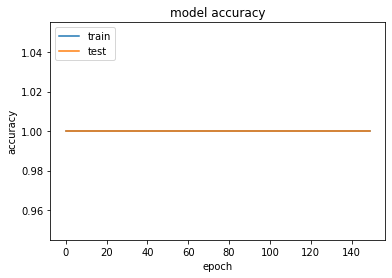

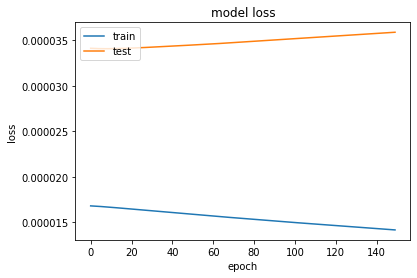

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()